# PROJEK AKHIR UAS
## BIG DATA AND DATA MINING (ST168)
## **PREDIKSI HARGA RUMAH MENGGUNAKAN LINEAR REGRESSION**


# **nama: IKHSANUDDIN AHMAD FAUZI**
# **nim: 23.11.5506**
# kelas: 23S1IF-BigData3(ST168)

# 1. MEMUAT DATASET

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prokshitha/home-value-insights")

print("Path to dataset files:", path)

100%|██████████| 26.4k/26.4k [00:00<00:00, 27.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/prokshitha/home-value-insights/versions/1


In [2]:
!ls {path}

house_price_regression_dataset.csv


# 2. Check Informasi Umum

In [4]:
import pandas as pd

dataset = pd.read_csv(f"{path}/house_price_regression_dataset.csv")
dataset.shape

(1000, 8)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [6]:
dataset.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


# 3. DATA PREPROCESSING

## cek misssing value

In [7]:
dataset.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


# 4. EDA

## Import Library

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Distribusi Variabel Target (House_Price)

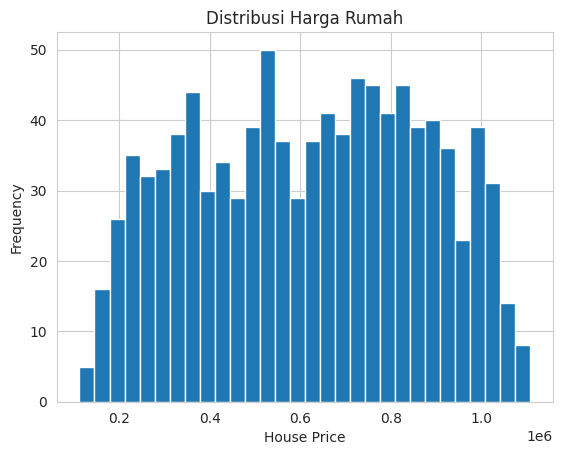

In [14]:
plt.figure()
plt.hist(dataset['House_Price'], bins=30)
plt.xlabel("House Price")
plt.ylabel("Frequency")
plt.title("Distribusi Harga Rumah")
plt.show()

## Hubungan Fitur vs Harga Rumah

### Square Footage vs House Price

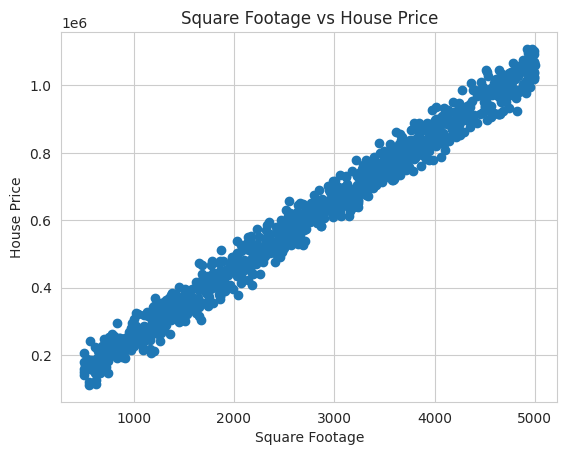

In [15]:
plt.figure()
plt.scatter(dataset['Square_Footage'], dataset['House_Price'])
plt.xlabel("Square Footage")
plt.ylabel("House Price")
plt.title("Square Footage vs House Price")
plt.show()


### Neighborhood Quality vs House Price

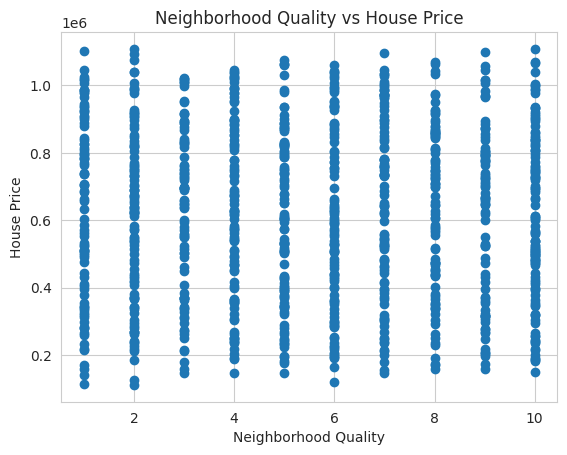

In [16]:
plt.figure()
plt.scatter(dataset['Neighborhood_Quality'], dataset['House_Price'])
plt.xlabel("Neighborhood Quality")
plt.ylabel("House Price")
plt.title("Neighborhood Quality vs House Price")
plt.show()


### Korelasi Antar Variabel

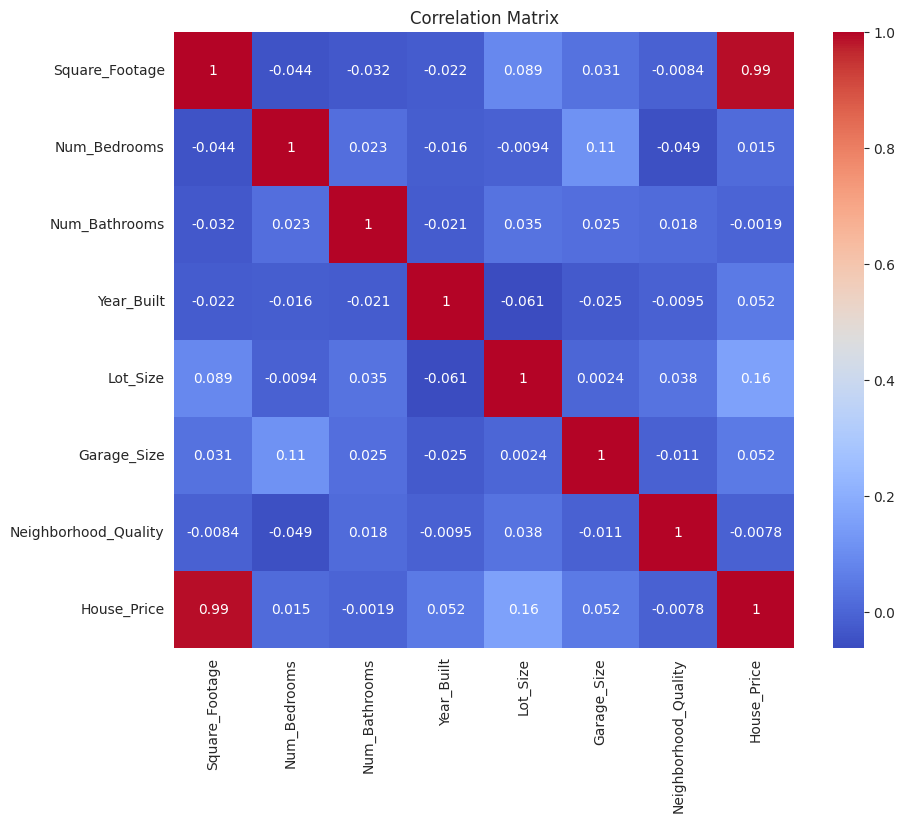

In [17]:
plt.figure(figsize=(10,8))
correlation = dataset.corr()

sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Boxplot

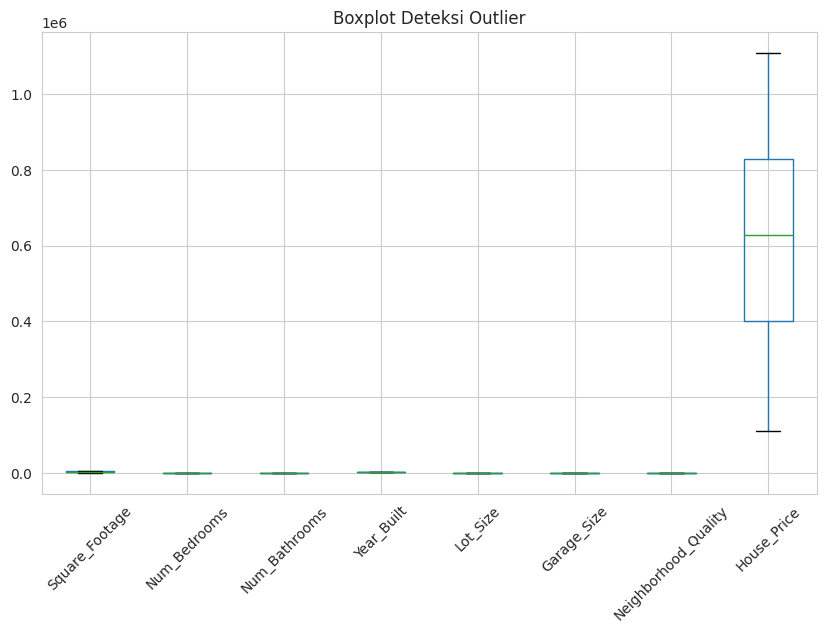

In [18]:
plt.figure(figsize=(10,6))
dataset.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot Deteksi Outlier")
plt.show()


# 5. SELEKSI FITUR

## seleksi fitur berdasarkan threshold korelasi

In [21]:

correlation_with_target = correlation['House_Price']

selected_features = correlation_with_target[abs(correlation_with_target) >= 0.1]

if 'House_Price' in selected_features.index:
    selected_features = selected_features.drop('House_Price')

selected_features

,House_Price
Square_Footage,0.991261
Lot_Size,0.160412


# 6. MODELING

## impor library

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Menentukan Fitur dan Target

In [23]:
X = dataset[['Square_Footage', 'Lot_Size']]
y = dataset['House_Price']


## Split Data (Train & Test)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Membuat dan Melatih Model Linear Regression

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# 7. EVALUASI MODEL

## Prediksi Data Uji

In [26]:
y_pred = model.predict(X_test)

In [29]:
result_df = pd.DataFrame({
    'Actual_Price': y_test.values,
    'Predicted_Price': y_pred
})

result_df.head(10)

,Actual_Price,Predicted_Price
0,9.010005e+05,8.470645e+05
1,4.945375e+05,4.983761e+05
2,9.494042e+05,9.810352e+05
3,1.040389e+06,1.063955e+06
4,7.940100e+05,8.012326e+05
5,7.240336e+05,7.691183e+05
6,9.984392e+05,9.627980e+05
7,9.097134e+05,8.546002e+05
8,7.926815e+05,8.163884e+05
9,9.474908e+05,9.272785e+05


## VISUALISASI HASIL PREDIKSI

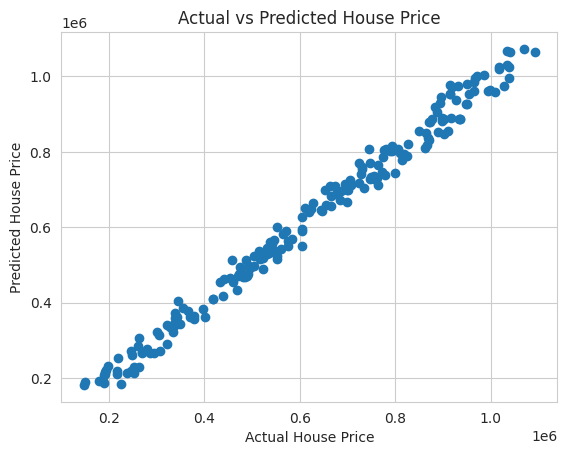

In [30]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted House Price")
plt.show()

## Evaluasi

In [27]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 739043186.0850306
R-squared (R²): 0.988534652652985


In [31]:
import numpy as np

rmse = np.sqrt(mse)
rmse

np.float64(27185.348739441077)

## Koefisien Model (Interpretasi)

In [28]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coeff_df)
print("Intercept:", model.intercept_)


          Feature   Coefficient
0  Square_Footage    198.752406
1        Lot_Size  14292.615834
Intercept: 19682.59924305021
